## Importing Libraries


In [1]:
import os   
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

## Feature Extraction Using HOG (Histogram of Oriented Gradients)

In [2]:
dir = os.getcwd()    # to get the current working directory path
print(dir)

C:\Users\RAMA KIRAN\ML_TUT\project


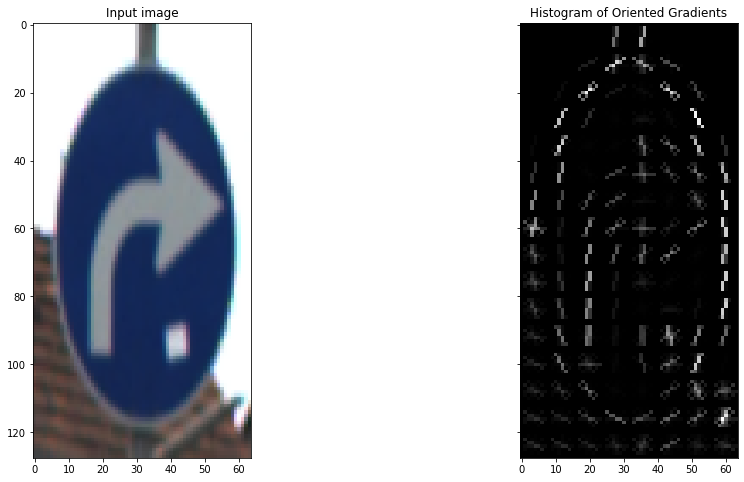

In [3]:
sample_path = os.path.join(dir, 'samples/s2.png')
sample_img = imread(sample_path)
resized_img = resize(sample_img, (128, 64))
xi, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize = True, multichannel = True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [4]:
xi.shape


(3780,)

## Loading train and test datasets

In [5]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [8]:
train_df.shape

(39209, 8)

In [9]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [10]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [11]:
X_train = []
y_train = []

for i in range(len(train_df)):
    # value of path col
    img_path = train_df.iloc[i, 7]
    
    # actual path of the image
    img_path = os.path.join(dir, img_path)
    sample_img = imread(img_path)
    resized_img = resize(sample_img, (128, 64))
    xi = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), multichannel = True)
    X_train.append(xi)
    y_train.append(train_df.iloc[i, 6])
        
        
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train.shape

(39209, 3780)

In [13]:
X_test = []
y_test = []

for i in range(len(test_df)):
    # value of path col
    img_path = test_df.iloc[i, 7]
    
    # actual path of the image
    img_path = os.path.join(dir, img_path)
    sample_img = imread(img_path)
    resized_img = resize(sample_img, (128, 64))
    xi = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), multichannel = True)
    X_test.append(xi)
    y_test.append(test_df.iloc[i, 6])
    
        
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
X_test.shape

(12630, 3780)

## SVM

In [15]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel = 'rbf', random_state = 0)
sv_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [16]:
y_pred = sv_classifier.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 48   9   1 ...   0   0   0]
 [  0 664  23 ...   0   0   0]
 [  0   6 713 ...   0   0   0]
 ...
 [  0   1   3 ...  84   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   1   3 ...   1   0  80]]


0.9304829770387966

# Naive Bayes


In [18]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = nb_classifier.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 47   3   4 ...   0   0   0]
 [  6 449  54 ...   5   0   0]
 [  0  44 493 ...  17   1   0]
 ...
 [  0   0   0 ...  86   0   1]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...   8   2  78]]


0.7650039588281868

## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [22]:
y_pred = knn_classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 28   7  10 ...   0   0   0]
 [  3 504  55 ...   0   0   0]
 [  0  19 463 ...   0   0   0]
 ...
 [  0   7   0 ...  66   0   0]
 [  0   0   0 ...   0  29   7]
 [  0   2   0 ...   0   2  54]]


0.771021377672209

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dt_classifier.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 38   2   1 ...   0   0   1]
 [  5 473  25 ...   2   0   2]
 [  0  24 598 ...   3   0   2]
 ...
 [  0   3   5 ...  20   0   1]
 [  0   0   0 ...   0  26   6]
 [  0   5   2 ...   2   4  44]]


0.7160728424386381

In [27]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.57      0.63      0.60        60\n           1       0.70      0.66      0.68       720\n           2       0.70      0.80      0.75       750\n           3       0.66      0.66      0.66       450\n           4       0.75      0.80      0.78       660\n           5       0.57      0.61      0.59       630\n           6       0.67      0.57      0.61       150\n           7       0.56      0.60      0.58       450\n           8       0.56      0.56      0.56       450\n           9       0.81      0.87      0.84       480\n          10       0.79      0.78      0.78       660\n          11       0.66      0.60      0.63       420\n          12       0.93      0.84      0.89       690\n          13       0.93      0.94      0.93       720\n          14       0.84      0.77      0.80       270\n          15       0.64      0.64      0.64       210\n          16       0.80      0.79      0.79       150\n       

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 200) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 35   1   0 ...   0   0   0]
 [  0 612  34 ...   0   0   0]
 [  0   0 727 ...   0   0   0]
 ...
 [  0   0   1 ...  72   0   0]
 [  0   0   0 ...   0  39   0]
 [  0   1   3 ...   0   2  62]]


0.9148851939825812

## PCA

In [ ]:
Xpca_train = []
ypca_train = []

for i in range(len(train_df)):
    # value of path col
    img_path = train_df.iloc[i, 7]
    
    # actual path of the image
    img_path = os.path.join(dir, img_path)
    sample_img = imread(img_path)
    resized_img = resize(sample_img, (128, 64))

    Xpca_train.append(xi)
    ypca_train.append(train_df.iloc[i, 6])
    
Xpca_train = np.array(Xpca_train)
ypca_train = np.array(ypca_train)

In [ ]:
Xpca_test = []
ypca_test = []

for i in range(len(test_df)):
    # value of path col
    img_path = test_df.iloc[i, 7]
    
    # actual path of the image
    img_path = os.path.join(dir, img_path)
    sample_img = imread(img_path)
    resized_img = resize(sample_img, (128, 64))

    Xpca_test.append(xi)
    ypca_test.append(train_df.iloc[i, 6])
    
Xpca_test = np.array(Xpca_test)
ypca_test = np.array(ypca_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3780)

Xpca = pca.fit_transform(Xpca_train)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))

In [ ]:
Xpca_train[0]

In [ ]:
pca_100 =  PCA(n_components = 100)
pca_reduced= pca_100.fit_transform(Xpca_train)
# pca_reduced = np.array(pca_reduced)

In [ ]:
# from sklearn.svm import SVC
svtest = SVC(kernel = 'rbf', random_state = 0)
svtest.fit(pca_reduced,ypca_train)

In [ ]:
pca_reduced_test= pca_100.fit_transform(Xpca_test)

In [ ]:
y_pred = svtest.predict(pca_reduced_test)

In [ ]:
m = confusion_matrix(ypca_test, y_pred)
print(m)
accuracy_score(ypca_test, y_pred)

## Single Prediction

In [32]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

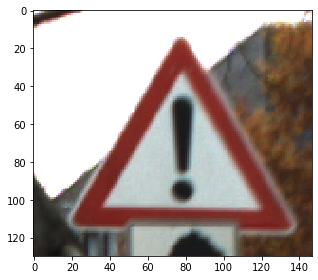

In [87]:
sample_path = os.path.join(dir, 'samples/s1.png')
sample_img = imread(sample_path)
imshow(sample_path)
resized_img = resize(sample_img, (128, 64))
xi = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), multichannel = True)

In [88]:
prediction = sv_classifier.predict([xi])
prediction = prediction[0]
# print('class id = ' ,prediction , '\n')
print('class label = ' ,classes[prediction + 1])

class label =  General caution


# Real Time Prediction using OpenCV

In [89]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    if ret == False:
        break
        
    cv2.imshow('frame', frame)
    
    resized_img = resize(frame, (128, 64))
    xi = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), multichannel = True)
    
    prediction = sv_classifier.predict([xi])
    prediction = prediction[0]
    print('class label = ' ,classes[prediction + 1])
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

class label =  Yield
class label =  General caution
class label =  General caution
class label =  Road narrows on the right
class label =  Road narrows on the right
class label =  Dangerous curve right
class label =  Road narrows on the right
class label =  Road narrows on the right
class label =  Keep right
class label =  General caution
class label =  Keep right
class label =  Keep right
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Keep right
class label =  Ahead only
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  General caution
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  Yield
class label =  General caution
class label =  General caution
class label =  General caution
class label =  General caution
class label =  General caution
class label 